In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [40]:
#a)

#X = house_df.sqft_living.values.reshape(-1,1)[:1000]
#y = house_df.price.values.reshape(-1)[:1000]

#Your code:
x = df['sqft_living'].astype(float)
y = df['price'].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=500)
model = LinearRegression() 

model.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1))


#Hint: .fit()

LinearRegression()

Intercept: -34570.21104356088
Coefficient: [276.12002193]
R^2 score: 0.5054208287866018


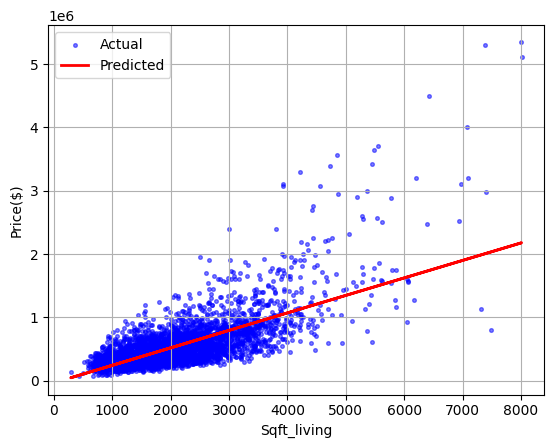

In [41]:
#b)

#Your code:

print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_}')

# Model evaluation using R^2
r2_score = model.score(x_test.values.reshape(-1,1), y_test)
print(f'R^2 score: {r2_score}')

y_pred = model.predict(x_test.values.reshape(-1,1))

plt.scatter(x_test, y_test, color='blue', alpha=0.5, s=7, label='Actual') 
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')  
plt.xlabel('Sqft_living')
plt.ylabel('Price($)')
plt.legend()
plt.grid()
plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

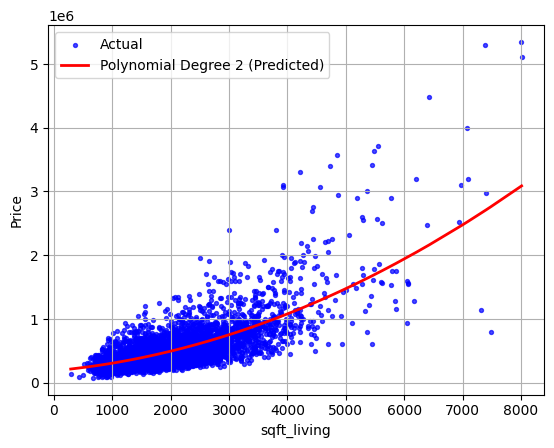

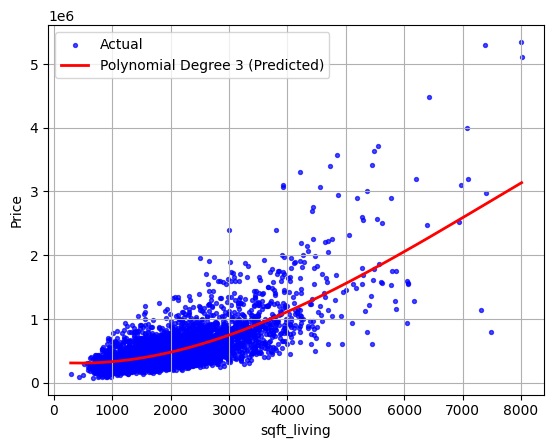

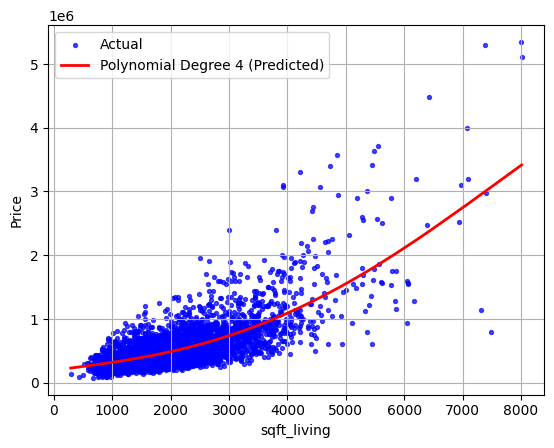

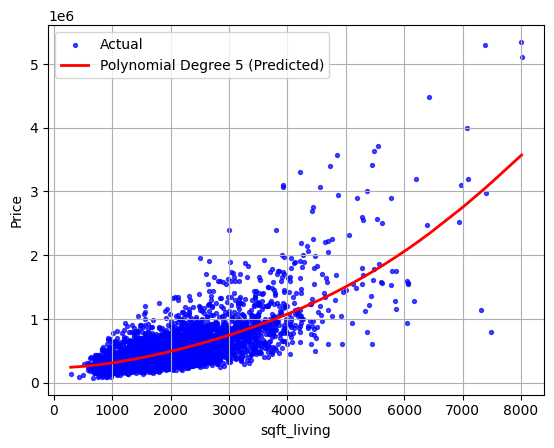

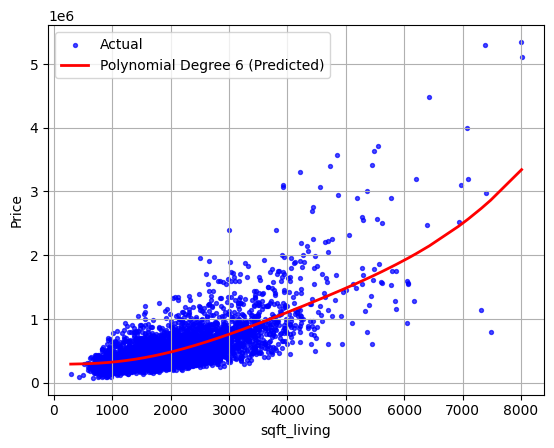

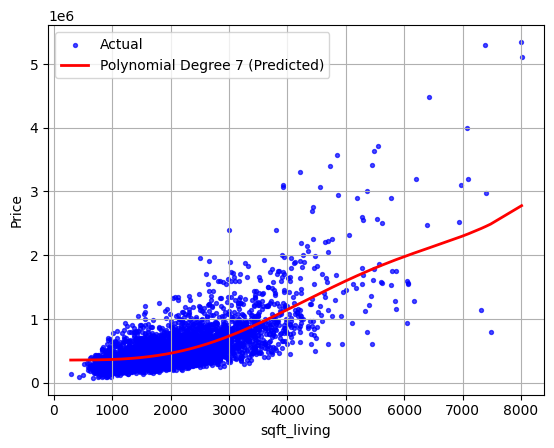

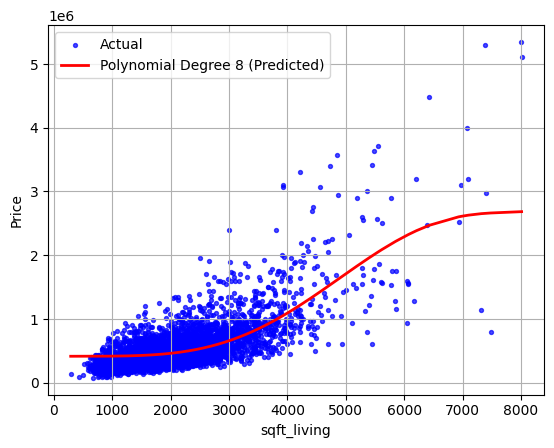

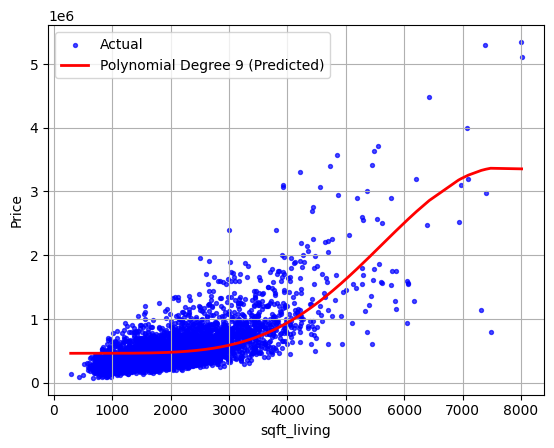

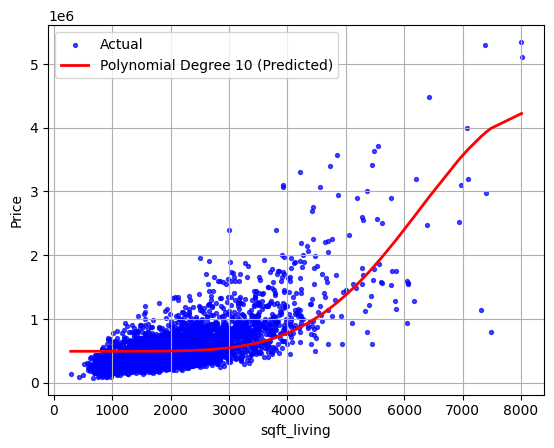

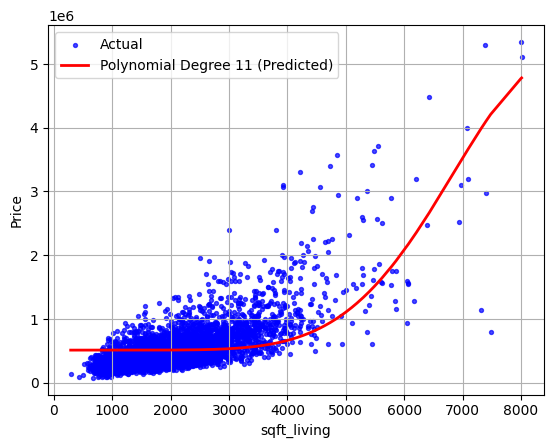

In [42]:
#c)
import random
from sklearn.metrics import mean_absolute_error, r2_score

max_degree = 12
degree = 2
degrees_selected = []
models = {}
train_mse_errors = [] 
test_mse_errors = []

# Loop through polynomial degrees until the maximum degree is reached
while max_degree > degree:
    # Create polynomial features for the given degree and transform data 
    poly = PolynomialFeatures(degree, include_bias = False)
    x_train_poly = poly.fit_transform(x_train.values.reshape(-1,1))
    x_test_poly = poly.transform(x_test.values.reshape(-1,1))

     # Initialize and fit the linear regression model with polynomial features and train model
    model_high_degrees = LinearRegression()
    model_high_degrees.fit(x_train_poly, y_train.values.reshape(-1))
    models[degree] = model_high_degrees #save models for later use

    # Make predictions on the test and training data
    y_test_pred_poly = model_high_degrees.predict(x_test_poly)
    y_train_pred_poly = model_high_degrees.predict(x_train_poly)

    # Calculate MSE for training and test data
    train_error = mean_squared_error(y_train, y_train_pred_poly)
    test_error = mean_squared_error(y_test, y_test_pred_poly)

    train_mse_errors.append(train_error)
    test_mse_errors.append(test_error)
    degrees_selected.append(degree)

    # Sort test data and predictions for plotting
    sorted_indices = np.argsort(x_test.values.flatten())  
    x_test_sorted = x_test.values.flatten()[sorted_indices]  
    y_pred_poly_sorted = y_test_pred_poly[sorted_indices]     


    # Plot actual test data points and predicted polynomial regression curve
    plt.scatter(x_test, y_test, color='blue', alpha=0.7, s=8, label='Actual')  
    plt.plot(x_test_sorted, y_pred_poly_sorted, color='red', linewidth=2, label=f'Polynomial Degree {degree} (Predicted)')
    plt.xlabel('sqft_living')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Increase the degree randomly by 1(i tried to change step from 
    # 1 to 5 but the best solution for present models is step = 1)
    step = random.randint(1, 1)
    degree += step



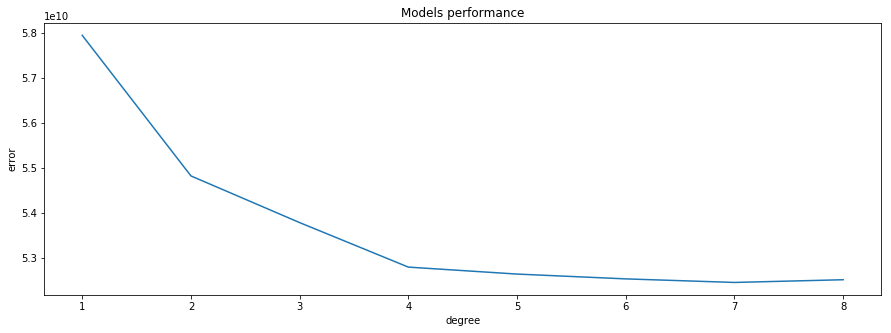

In [5]:
#Your code:


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

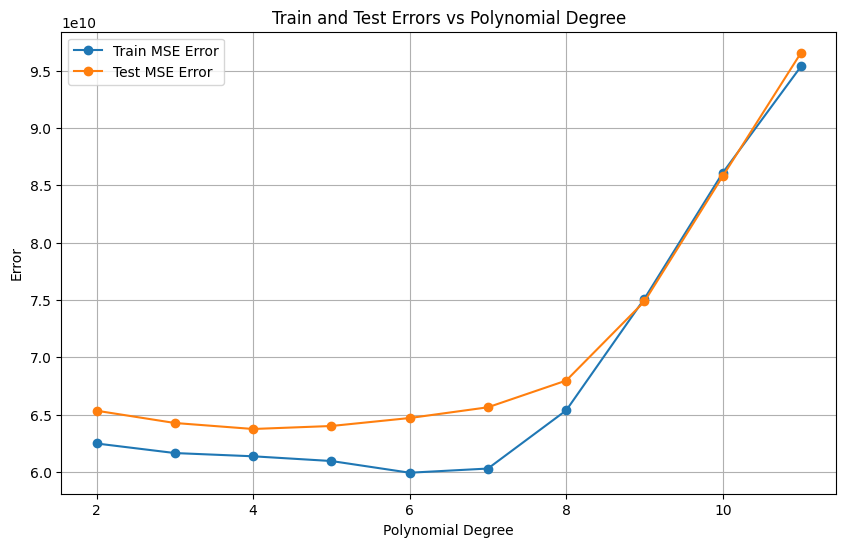

In [43]:
#a)

plt.figure(figsize=(10, 6))
plt.plot(degrees_selected, train_mse_errors, label='Train MSE Error', marker='o')
plt.plot(degrees_selected, test_mse_errors, label='Test MSE Error', marker='o')

plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.title('Train and Test Errors vs Polynomial Degree')
plt.legend()
plt.grid(True)
plt.show()

Increasing the degree of the polynomial causes the error to grow exponentially because the model becomes too flexible and starts adjusting to the noise in the data, causing overfitting. This makes the model unable to generalize to new data, especially the test set, due to capturing random fluctuations in the training data.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

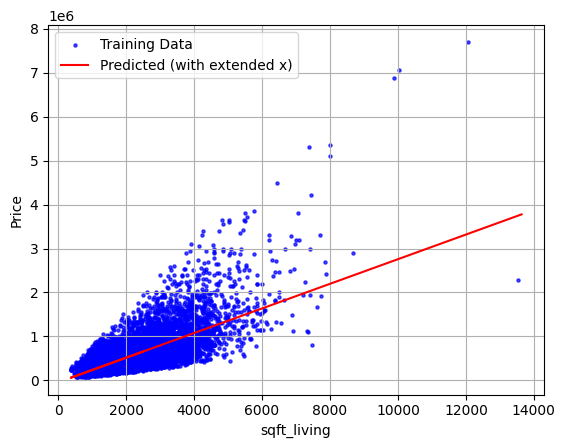

In [44]:
#a)
x = df['sqft_living'].astype(float)
y = df['price'].astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=200)
model = LinearRegression() 

#Your code:
model.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1))

x_max = x_train.max()
x_extended = np.linspace(x_max, x_max + 100, 500).reshape(-1, 1)  # Create new values ​​for x

# Combine the original training data and the extended values
x_combined = np.vstack((x_train.values.reshape(-1, 1), x_extended))

# Forecasting on combined data (including hypothetical values)
y_combined_pred = model.predict(x_combined)

# Visualization of results
plt.scatter(x_train, y_train, color='blue', alpha=0.7, s=5, label='Training Data')
plt.plot(x_combined, y_combined_pred, color='red', label='Predicted (with extended x)')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals(Proposed/Polynomial): {0}".format(mean_squared_error(y_pred, y_test)))

#Your model: (I decided to keep the number of features constant(=4) to compare how different regressions would handle a similar task)
# ----------------------------------------------------------------------------------------------------------
X = df[['sqft_living', 'sqft_lot', 'grade', 'view']].values
y = df['price'].values

# Create a pipeline with polynomial features up to degree 3, standard scaling, and Ridge regression with cross-validation
model = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),  # Create polynomial features up to the 3rd degree
    StandardScaler(),  # Standardize the data
    RidgeCV(alphas=[0.05, 0.1, 0.5, 1.0], cv=4)  # Ridge regression with cross-validation to select alpha parameter
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

# Train the Ridge regression model on the training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Polynomial + RidgeCV): {mse}')

# ----------------------------------------------------------------------------------------------------------
from sklearn.ensemble import GradientBoostingRegressor

X = df[['sqft_living', 'sqft_lot', 'grade', 'view']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

# Create and train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=90, learning_rate=0.08, max_depth=3, random_state=43)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Gradient Boosting): {mse}')

# ------------------------------------------------------------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor

X = df[['sqft_living', 'sqft_lot', 'grade', 'view']].values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=43)

# Create and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=90, max_depth=6, random_state=43)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Random Forest): {mse}')


Mean squared error equals(Proposed/Polynomial): 48749247682.69787
Mean Squared Error (Polynomial + RidgeCV): 48286129938.197525
Mean Squared Error (Gradient Boosting): 46687001239.98557
Mean Squared Error (Random Forest): 48281584434.46166


I also tried using Lasso regression and Cube-Splines but the MSE were worse than for the proposed model, so i left only those models that showed the best results.